<a href="https://colab.research.google.com/github/Sebastianwhc/Vision-Artificial/blob/main/Neural_Networks_with_Fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Artificial Vision

First of all we are going to import tensorflow and check its version

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.12.0


Now, let's import keras and see its version

In [ ]:
from tensorflow import keras
print(keras.__version__)

2.12.0


We will train a neural network to recognize clothing items from a common dataset called Fashion MNIST. You can learn more about this dataset [here](https://github.com/zalandoresearch/fashion-mnist).

It contains 70,000 clothing items in 10 different categories. Each clothing item is in a 28x28 grayscale image. You can see some examples here:

![alt text](https://github.com/zalandoresearch/fashion-mnist/raw/master/doc/img/fashion-mnist-sprite.png)

In [ ]:
from keras.utils import plot_model
# librerías auxiliares
import pandas as pd
import numpy as np
np.set_printoptions(linewidth=200)
import matplotlib.pyplot as plt

Fashion MNIST data is available directly in the tf.keras datasets API. We load it as follows:

In [ ]:
fashion_mnist = keras.datasets.fashion_mnist

Calling `load_data` on this object will give us two sets of two lists, these will be the training and testing values ​​for the graphs containing the clothing items and their labels.

In [ ]:
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


Let's look at the size of the dataset, and the size of the image.

In [ ]:
X_train_full.shape, y_train_full.shape

((60000, 28, 28), (60000,))

Here we check the data type

In [ ]:
X_train_full.dtype

dtype('uint8')

What do these values ​​look like? Let's print out a training image and a training label to see... Experiment with different indices in the array. For example, also take a look at index `99`... that's a different seed than index `0`.

In [ ]:
print(X_train_full[99])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   3   0   0  57  78  87  47  25   4   0   0   0   1   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   3   0  12 154 123  33  57  48  82 118  56   0   0   1   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   2   0  94 125   0   0   0   0   0  86 203  39   0   5   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   1   0   1 125  82   0   1   1   3   0  55 133  45   0   4   1   0   0   0   0   0]
 [  0   0   2   6   2   2   1   0   0  20 163  75   0   2   2   2   0 109 116  71   0   2   1   1   6   5   4   0]
 [  0   2   0   0   0   0   0   0   0   1 183  65   0   0   0   0   0 141 126  3

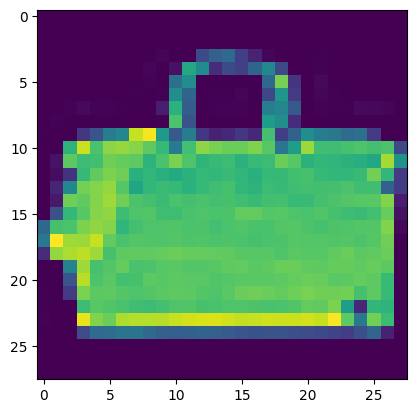

In [ ]:
plt.imshow(X_train_full[99]);

Le damos un nombre a cada una de las clases

In [ ]:
# Etiquetas (columnas) que trae el DS.
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
class_names[y_train_full[0]]

'Ankle boot'

Note that all the values ​​in the number are between 0 and 255. If we're training a neural network, for several reasons it's easier if we treat all the values ​​as between 0 and 1 (one of them being that it makes it easier to use the gradient descent algorithm), a process called 'normalization'... and fortunately in Python it's easy to normalize a list like this without loops. Here's how we do it:

In [ ]:
X_valid, X_train = X_train_full[:5000]/255.0, X_train_full[5000:]/255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

Now you might be wondering why there are 2 training and testing sets. The idea is to have 1 dataset for training and then another dataset that the model hasn’t seen yet, to see how good it would be at classifying values. After all, when it’s done, we’ll want to test it on data it hasn’t seen before!

# Creación del modelo usando Keras

In [ ]:
# Definimos el modelo con el que vamos a entrenar.
# Cada una de estas secuencias es una capa de la red neuronal.
model= keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))    # "aplanamos" cada una de las imágenes para transformarlas en UN VECTOR.
model.add(keras.layers.Dense(128, activation="relu"))   # Creamos una primera capa: aplicamos una densidad a las capas de 128 y una FA ReLU.
model.add(keras.layers.Dense(10, activation="softmax")) # Creamos una segunda capa: se encarga de aprender un poco más con densidad 10 y FA softmax.

`Sequential`: Allows us to define a SEQUENCE of layers in the neural network.

`Flatten`: Remember how our images were a square before, when we printed them out? Flatten takes that square and turns it into a 1-dimensional array.

`Dense`: Adds a layer of neurons.

`relu`: Means "If `X > 0` return `X`, otherwise return `0`", so what it does is it only passes values ​​`0` or greater to the next layer in the network.

`softmax`: Takes a set of values ​​and picks the largest one, so for example if the output of the last layer looks like `[0.1, 0.1, 0.05, 0.1, 9.5, 0.1, 0.05, 0.05, 0.05]`, it finds the largest value and turns it into `[0,0,0,0,1,0,0,0,0]` – the goal is to save a lot of coding!

another way to do this same operation of adding layers:

In [ ]:
# model= keras.models.Sequential([]
#    keras.layers.Flatten(input_shape=[28,28])
#    keras.layers.Dense(300, activation="relu")
#    keras.layers.Dense(300, activation="relu")
#    keras.layers.Dense(10, activation="softmax")
#])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


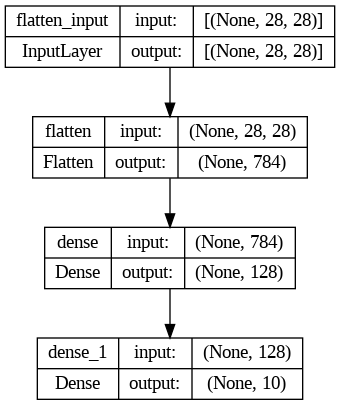

In [ ]:
plot_model(model, show_shapes=True)

Now let's look at the layers.

In [ ]:
model.layers

some interesting operations and commands

In [ ]:
hidden1=model.layers[0]
hidden1.name

'flatten'

In [ ]:
hidden1=model.layers[1]
hidden1.name

'dense'

In [ ]:
model.get_layer('flatten') is hidden1

False

All parameters of a layer are accessible using `get_weights()` and `set_weights()`

In [ ]:
weights, biases = hidden1.get_weights()
weights

array([[ 0.03139416, -0.0772654 , -0.07135119, ..., -0.07535616, -0.00503529, -0.07071846],
       [-0.07173819, -0.07888247,  0.00883465, ...,  0.05414539, -0.07861127, -0.05306153],
       [-0.02014362,  0.04939891,  0.00091025, ...,  0.00232191,  0.02413107, -0.05911481],
       ...,
       [-0.04502844,  0.03073276, -0.05061118, ...,  0.06931239, -0.03764057,  0.07728679],
       [ 0.0612819 , -0.06592105,  0.01311474, ...,  0.02080958,  0.07349458, -0.01934412],
       [ 0.04384878,  0.0142215 ,  0.05191039, ...,  0.00375088,  0.04227896, -0.05829149]], dtype=float32)

In [ ]:
weights.shape

(784, 128)

In [ ]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [ ]:
biases.shape

(128,)

In [ ]:
flatten = model.layers[0] # Capa de entrada: flatten
flatten.input_shape, flatten.input_spec

((None, 28, 28), InputSpec(min_ndim=1))

In [ ]:
hidden2 = model.layers[1] # Primera capa dense
weights2, biases2 = hidden2.get_weights()
weights2.shape  # 28 x 28 = 784

(784, 128)

In [ ]:
hidden3 = model.layers[2] # Tercera capa dense: softmax
weights3, biases3 = hidden3.get_weights()
weights3.shape

(128, 10)

# Compiling the model

The next thing we need to do, now that the model is defined, is to build it. We do this by compiling it with an optimizer and a loss function, and then we train it by calling `model.fit` asking it to fit the training data to the training labels, i.e. we have it figure out the relationship between the training data and its actual labels, so in the future if it has data that looks like the training data, it can make a prediction of what that data would look like.

In [ ]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer= "adam",
              metrics =["accuracy"])

# Training and evaluating the model

It is initially evaluated with `epochs = 5` to validate its performance. We add the validation data so that we can also see the evolution of this information as the neural network is trained.

In [ ]:
history = model.fit(X_train, y_train, epochs=5, validation_data=(X_valid, y_valid))

Epoch 1/5
1719/1719 [==============================] - 9s 5ms/step - loss: 0.5124 - accuracy: 0.8196 - val_loss: 0.4104 - val_accuracy: 0.8528
Epoch 2/5
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3814 - accuracy: 0.8626 - val_loss: 0.3473 - val_accuracy: 0.8738
Epoch 3/5
1719/1719 [==============================] - 8s 5ms/step - loss: 0.3401 - accuracy: 0.8754 - val_loss: 0.3324 - val_accuracy: 0.8768
Epoch 4/5
1719/1719 [==============================] - 8s 5ms/step - loss: 0.3175 - accuracy: 0.8839 - val_loss: 0.3258 - val_accuracy: 0.8760
Epoch 5/5
1719/1719 [==============================] - 7s 4ms/step - loss: 0.2959 - accuracy: 0.8917 - val_loss: 0.3085 - val_accuracy: 0.8846


Now we are going to check the variables `loss`, `accuracy`, `validation loss` and `validation_accuracy`

In [ ]:
pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy
0,0.512413,0.819618,0.410366,0.8528
1,0.381402,0.862582,0.347349,0.8738
2,0.340053,0.875418,0.332398,0.8768
3,0.317485,0.883927,0.325841,0.8760
4,0.295894,0.891673,0.308539,0.8846


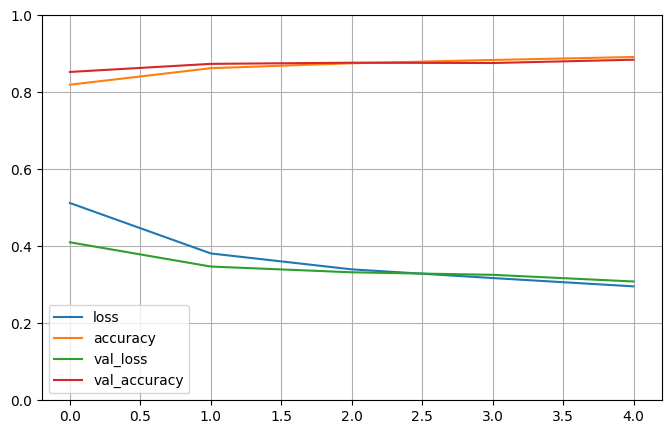

In [ ]:
# 'history.history' contiene todos los valores 'loss', 'accuracy', 'val_loss' y
  # 'val_accuracy' resultado del entrenaminto del modelo.
# 'pd.DataFrame' se utiliza para crear el dataframe basado en la historia.
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

We can notice that the *training accuracy* and *validation accuracy* curves increase during training, while the loss curves become smaller.

Once you've finished training, you should see an accuracy value at the end of the final epoch. It might look something like `0.9261`. This tells you that your neural network is around **93%** accurate at classifying the training data. That is, it discovered a pattern match between the image and the labels that worked 93% of the time. Too good, and it's not normal for it to have such a high accuracy value considering it was only trained for 5 epochs and was done pretty quickly.

But how would it work on data it hasn't seen? That's why we have the test images. We can call `model.evaluate` and pass in the two sets, and it will report the loss for each. Let's give it a try:

In [ ]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 51.9772 - accuracy: 0.8624


[51.977203369140625, 0.8623999953269958]

This result may be around `0.80`, meaning it was around **80%** accurate. As you might expect, it probably wouldn't work as well on data it hasn't seen as it did on the data it was trained on.

To explore further, try the following exercises: